In [52]:
# Reading the Data
import pandas as pd
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [53]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective mean values. Let's do the latter.

In [54]:
# replacing zero values with the mean of the column
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

In [55]:
# Handling the Outliers

q = data['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data[data['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

In [56]:
x=data_cleaned.drop(columns='Outcome',axis=1)

In [57]:
# we need to scale our data as well
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_transformed=sc.fit_transform(x)

In [58]:
# now we will check for multicollinearity using VIF(Variance Inflation factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(data_transformed,i) for i in range(data_transformed.shape[1])]
vif["Features"] = x.columns

#let's check the values
vif

,vif,Features
0,1.449056,Pregnancies
1,1.304263,Glucose
2,1.262686,BloodPressure
3,1.470049,SkinThickness
4,1.271017,Insulin
5,1.513160,BMI
6,1.042300,DiabetesPedigreeFunction
7,1.662728,Age


All the VIF values are less than 5 and are very low. That means no multicollinearity. Now, we can go ahead with fitting our data to the model. Before that, let's split our data in test and training set.

In [59]:
df=pd.DataFrame(data_transformed,columns=x.columns)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.796754,0.983984,0.000453,1.091487,-0.434192,0.265820,0.630485,1.601415
1,-0.864794,-1.169776,-0.504474,0.385681,-0.434192,-0.831445,-0.338079,-0.132706
2,1.461373,2.180518,-0.672784,-0.609921,-0.434192,-1.348727,0.788402,-0.041437
3,-0.864794,-1.033030,-0.504474,-0.320125,-0.144202,-0.596317,-0.983787,-1.045402
4,0.464444,-0.109989,0.168762,-0.609921,-0.434192,-0.988197,-0.864472,-0.223976


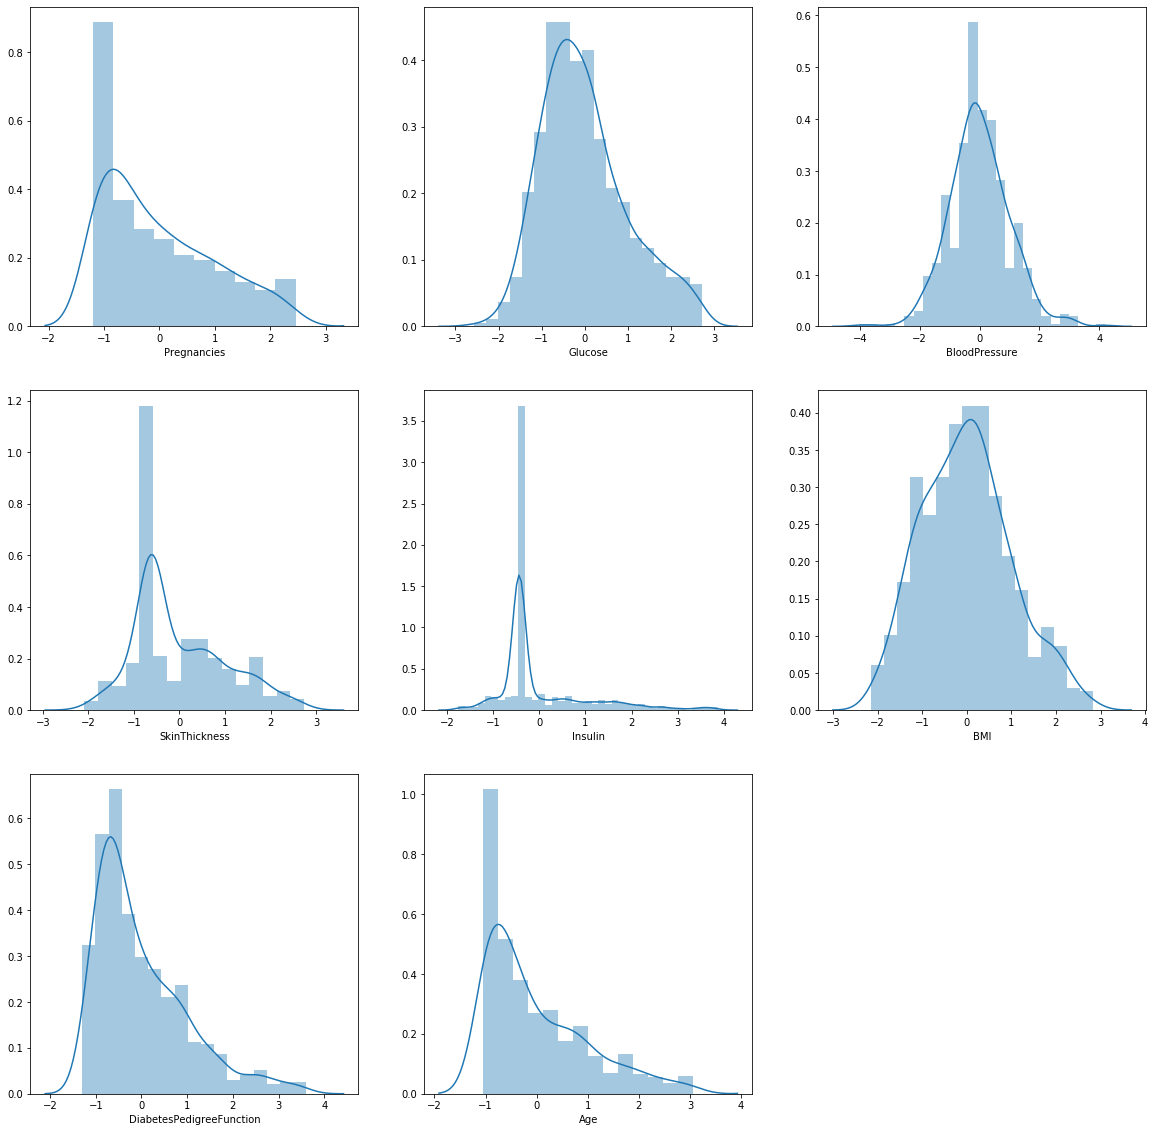

In [60]:
# let's see how data is distributed for every column
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plotnumber=1
plt.figure(figsize=(20,20))
if plotnumber <=8:
    for columns in df:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[columns])
        plt.xlabel(columns)
        plotnumber+=1

In [61]:
y=data_cleaned['Outcome']

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.25,random_state=355)

In [63]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [64]:
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [65]:
y_pred = model.predict(x_test)

In [66]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7633136094674556


In [67]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_test,y_pred)
print(conf)

[[98 19]
 [21 31]]


In [68]:
true_positive=conf[0,0]
true_negative=conf[1,1]
false_positive=conf[0,1]
false_negative=conf[1,0]

In [69]:
# Breaking down the formula for Accuracy
accuracy=(true_positive+true_negative)/(true_positive+true_negative+false_positive+false_negative)
accuracy

0.7633136094674556

In [70]:
#Precision
precision=true_positive/(true_positive+false_positive)
precision

0.8376068376068376

In [71]:
#recall
recall=true_positive/(true_positive+false_negative)
print(recall)

0.8235294117647058


In [72]:
#F1 score
F1_score=2*(precision*recall)/(precision+recall)
F1_score

0.8305084745762712

So far we have been doing grid search to maximise the accuracy of our model. Here, we’ll follow a different approach. We’ll create two models, one with Logistic regression and other with Naïve Bayes and we’ll compare the AUC. The algorithm having a better AUC shall be considered for production deployment.

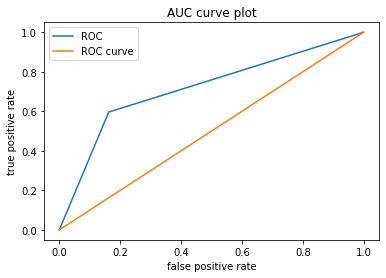

In [73]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],label='ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('AUC curve plot')
plt.legend()

In [74]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\kapasiya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
y_pred_log=lr.predict(x_test)

In [76]:
accuracy_logistic=accuracy_score(y_test,y_pred_log)
accuracy_logistic

0.8284023668639053

In [77]:
#confusion_matrix
confusion_mat_log=confusion_matrix(y_test,y_pred_log)
confusion_mat_log

array([[108,   9],
       [ 20,  32]], dtype=int64)

In [78]:
#ROC
fpr_log,tpr_log,thresold_log=roc_curve(y_test,y_pred_log)

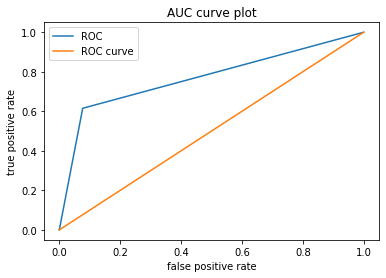

In [79]:
#graph for logistic regression
plt.plot(fpr_log,tpr_log,label='ROC')
plt.plot([0,1],[0,1],label='ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('AUC curve plot')
plt.legend()

In [80]:
# Area Under Curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
auc

0.716880341880342

In [81]:
auc_log = roc_auc_score(y_test, y_pred_log)
auc_log

0.7692307692307693

Here, you can see that the AUC for logistic regression is more. So, we’ll take that as our production-ready model.